# 10. 텍스트 분류(Text Classification)

텍스트 분류(Text Classification)은 텍스트를 입력으로 받아, 텍스트가 어떤 종류의 범주(Class)에 속하는지를 구분하는 작업을 구합니다. 

나이브 베이즈 분류와 인공 신경망 방법인 바닐라 RNN과 LSTM을 이용해서 텍스트 분류를 진행해보도록 하겠습니다.

## 목차
1. 케라스를 이용한 텍스트 분류 개요(Text Classification using Keras)
2. 스팸 메일 분류하기(Spam Detection)
3. 로이터 뉴스 분류하기(Reuters News Classification)
4. IMDB 리뷰 감성 분류하기(IMDB Movie Review Sentiment Analysis)
5. 나이브 베이즈 분류기(Naive Bayes Classifier)
6. 네이버 영화 리뷰 감성 분류하기(Naver Movie Review Sentiment Analysis)

## 1. 케라스를 이용한 텍스트 분류 개요(Text Classification using Keras)

나이브 베이즈 분류기를 통해서 텍스트를 분류해보겠습니다.

### 1) 훈련 데이터에 대한 이해

20,000개의 메일 샘플을 가진 이 데이터는 메일의 내용을 담고 있는 텍스트 데이터와 이 데이터가 스팸 메일인지 아닌지가 적혀있는 레이블. 두 가지 열로 이루어져있습니다.

![](https://wikidocs.net/images/page/24873/%EB%B6%84%EB%A5%98.png)

### 2) 훈련 데이터와 테스트 데이터

갖고 있는 데이터에서 분류하고자 하는 텍스트 데이터의 열을 X, 레이블 데이터의 열을 y라고 명명합니다. 그리고 이를 훈련 데이터(X_train, y_train)와 테스트 데이터(X_test, y_test)로 분리합니다. 모델은 X_train과 y_train을 학습하고, X_test에 대해서 레이블을 예측하게 됩니다. 그리고 모델이 예측한 레이블과 y_test를 비교해서 정답률을 계산하게 됩니다.

### 3) 단어에 대한 인덱스 부여

케라스의 Embedding()은 단어 각각에 대해 정수가 맵핑된 입력에 대해서 임베딩 작업을 수행할 수 있게 해줍니다.

단어 각각에 숫자 맵핑, 인덱스를 부여하는 방법으로는 2챕터의 정수 인코딩 챕터에서와 같이 단어를 빈도수 순대로 정렬하고 순차적으로 인덱스를 부여하는 방법이 있습니다. 등장 빈도순대로 단어를 정렬하여 인덱스를 부여하였을 때의 장점은 등장 빈도수가 적은 단어의 제거입니다.

### 4) RNN으로 분류하기

```
# 실제 RNN 은닉층을 추가하는 코드.
model.add(SimpleRNN(hidden_size, input_shape=(timesteps, input_dim)))
```

텍스트 분류 관점에서 앞서 배운 RNN 코드의 timesteps와 input_dim을 해석해보면 다음과 같습니다.

- hidden_size = 출력의 크기(output_dim).
- timesteps = 시점의 수 = 각 문서에서의 단어 수.
- input_dim = 입력의 크기 = 각 단어의 벡터 표현의 차원 수.

### 5) RNN의 다-대-일(Many-to-One) 문제

![](https://wikidocs.net/images/page/24873/many_to_one.PNG)

텍스트 분류는 RNN의 다-대-일(Many-to-One) 문제에 속합니다. 즉, 텍스트 분류는 모든 시점(time-step)에 대해서 입력을 받지만 최종 시점의 RNN 셀만이 은닉 상태를 출력하고, 이것이 출력층으로 가서 활성화 함수를 통해 정답을 고르는 문제가 됩니다.

이 때 두 개의 선택지 중에서 정답를 고르는 이진 분류(Binary Classification) 문제라고 하며, 세 개 이상의 선택지 중에서 정답을 고르는 다중 클래스 분류(Multi-Class Classification) 문제라고 합니다. 이 두 문제에서는 각각 문제에 맞는 다른 활성화 함수와 손실 함수를 사용할 것입니다.

이진 분류의 문제의 경우 출력층의 활성화 함수로 시그모이드 함수를, 손실 함수로 binary_crossentropy를 사용합니다.
- 스팸 메일 분류하기와 IMDB 리뷰 감성 분류하기

다중 클래스 문제라면 출력층의 활성화 함수로 소프트맥스 함수를, 손실 함수로 categorical_crossentropy를 사용합니다. 또한, 다중 클래스 분류 문제의 경우에는 클래스가 N개라면 출력층에 해당되는 밀집층(dense layer)의 크기는 N이어야 합니다. 즉, 출력층의 뉴런의 수도 N개여야 합니다.
- 로이터 뉴스 분류하기

## 2. 스팸 메일 분류하기(Spam Detection)

캐글에서 제공하는 정상 메일과 스팸 메일이 섞여져 있는 스팸 메일 데이터를 가지고, 데이터에 대한 전처리를 진행하고 바닐라 RNN(Vanilla RNN)을 이용한 스팸 메일 분류기를 구현해보도록 하겠습니다.

### 1) 스팸 메일 데이터에 대한 이해

다운로드 링크 : https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('spam.csv',encoding='latin1')

In [2]:
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


여기서 Unnamed라는 이름의 3개의 열은 텍스트 분류를 할 때 불필요한 열입니다. ham은 정상 메일을 의미하고, spam은 스팸 메일을 의미합니다. v2열은 메일의 본문을 담고있습니다.

레이블과 메일 내용이 담긴 v1열과 v2열만 필요하므로, Unnamed: 2, Unnamed: 3, Unnamed: 4 열은 삭제합니다. 또한, v1열에 있는 ham과 spam 레이블을 각각 숫자 0과 1로 바꾸겠습니다.

In [3]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


해당 data의 정보를 확인해보겠습니다.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null int64
v2    5572 non-null object
dtypes: int64(1), object(1)
memory usage: 87.1+ KB


v1열은 정수형 데이터, v2열은 문자열 데이터를 갖고있습니다. 

Null 데이터가 있는지는 Pandas의 isnull().values.any()로도 확인 가능합니다.

In [5]:
data.isnull().values.any()

False

False는 별도의 Null값은 없음을 의미합니다. 

스팸 메일 유무가 기재되어있는 레이블 값의 분포를 보도록 하겠습니다.

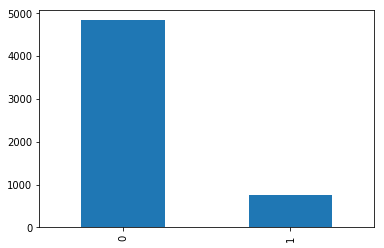

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
data['v1'].value_counts().plot(kind='bar');

이제 X와 y를 분리해보도록 하겠습니다. 정확히는 v2열을 X, v1열을 y로 저장하기만 하면됩니다.

In [7]:
X_data = data['v2']
y_data = data['v1']
print(len(X_data))
print(len(y_data))

5572
5572


이제 토큰화와 정수 인코딩 과정을 수행해보도록 하겠습니다.

In [9]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data) #5572개의 행을 가진 X의 각 행에 토큰화를 수행
sequences = tokenizer.texts_to_sequences(X_data) #단어를 숫자값, 인덱스로 변환하여 저장

In [10]:
print(sequences[:5])

[[50, 469, 4410, 841, 751, 657, 64, 8, 1324, 89, 121, 349, 1325, 147, 2987, 1326, 67, 58, 4411, 144], [46, 336, 1495, 470, 6, 1929], [47, 486, 8, 19, 4, 796, 899, 2, 178, 1930, 1199, 658, 1931, 2320, 267, 2321, 71, 1930, 2, 1932, 2, 337, 486, 554, 955, 73, 388, 179, 659, 389, 2988], [6, 245, 152, 23, 379, 2989, 6, 140, 154, 57, 152], [1018, 1, 98, 107, 69, 487, 2, 956, 69, 1933, 218, 111, 471]]


sequences에는 X_data의 단어들이 각 단어에 맵핑되는 정수로 인코딩되어 저장되었습니다.

In [11]:
word_index = tokenizer.word_index
print(word_index)

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'call': 16, 'have': 17, 'on': 18, '2': 19, 'that': 20, 'now': 21, 'are': 22, 'so': 23, 'but': 24, 'not': 25, 'or': 26, 'do': 27, 'can': 28, 'at': 29, "i'm": 30, 'get': 31, 'be': 32, 'will': 33, 'if': 34, 'ur': 35, 'with': 36, 'just': 37, 'no': 38, 'we': 39, 'this': 40, 'gt': 41, '4': 42, 'lt': 43, 'up': 44, 'when': 45, 'ok': 46, 'free': 47, 'from': 48, 'how': 49, 'go': 50, 'all': 51, 'out': 52, 'what': 53, 'know': 54, 'like': 55, 'good': 56, 'then': 57, 'got': 58, 'was': 59, 'come': 60, 'its': 61, 'am': 62, 'time': 63, 'only': 64, 'day': 65, 'love': 66, 'there': 67, 'send': 68, 'he': 69, 'want': 70, 'text': 71, 'as': 72, 'txt': 73, 'one': 74, 'going': 75, 'by': 76, 'home': 77, "i'll": 78, 'need': 79, 'about': 80, 'r': 81, 'lor': 82, 'sorry': 83, 'stop': 84, 'still': 85, 'see': 86, 'back': 87, 'today': 88, 'n': 89, 'da': 90, 'our': 91, 'reply':

tokenizer.word_index는 X_data에 존재하는 모든 단어와 부여된 인덱스를 리턴합니다. 

In [12]:
print((len(word_index)))

8920


X_data에는 총 8,920개의 단어가 있음을 확인할 수 있습니다.

In [13]:
n_of_train = int(5572 * 0.8)
n_of_test = int(5572 - n_of_train)
print(n_of_train)
print(n_of_test)

4457
1115


전체 데이터의 80%를 훈련용 데이터로, 20%를 테스트 데이터로 사용하고자 합니다.

직관적으로 변수를 기억하기위해 X_data에 대해서 정수 인코딩 된 결과인 sequences를 X_data로 변경하고, 전체 데이터에서 가장 길이가 긴 메일과 전체 메일 데이터의 길이 분포를 알아보도록 하겠습니다.

메일의 최대 길이 : 189
메일의 평균 길이 : 15.794867193108399


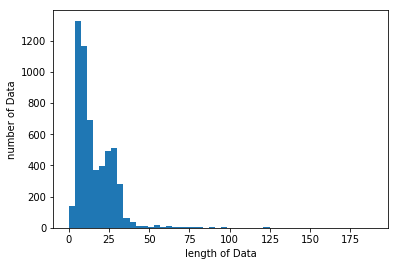

In [14]:
X_data=sequences
print('메일의 최대 길이 :',max(len(l) for l in X_data))
print('메일의 평균 길이 :',sum(map(len, X_data))/len(X_data))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

가장 긴 메일의 길이는 189이며, 그래프를 봤을 때 전체 데이터의 길이 분포는 대체적으로 약 50이하의 길이를 가지는 것을 볼 수 있습니다.

### 2) RNN으로 스팸 메일 분류하기

In [15]:
from keras.layers import SimpleRNN, Embedding, Dense
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
vocab_size = len(word_index)+1
# 단어의 수.
max_len = 189
# 전체 데이터셋의 길이는 189로 맞춥니다.
data = pad_sequences(X_data, maxlen=max_len)
print("data shape: ", data.shape)

data shape:  (5572, 189)


maxlen에는 가장 긴 메일의 길이였던 189이라는 숫자를 넣었습니다. 이는 5,572개의 X_data의 길이를 전부 189로 바꿉니다. 189보다 길이가 짧은 메일 샘플은 전부 숫자 0이 패딩되어 189의 길이를 가지게 됩니다.

이제 X_data 데이터는 5,572 × 189의 모양을 갖게됩니다. 헷갈리지 말아야할 것은 아직 X_train과 X_test를 분리하지 않았다는 것입니다. 

 훈련 데이터와 테스트 데이터를 분리해봅니다.

In [16]:
X_test = data[n_of_train:] #X_data 데이터 중에서 뒤의 1115개의 데이터만 저장
y_test = y_data[n_of_train:] #y_data 데이터 중에서 뒤의 1115개의 데이터만 저장
X_train = data[:n_of_train] #X_data 데이터 중에서 앞의 4457개의 데이터만 저장
y_train = y_data[:n_of_train] #y_data 데이터 중에서 앞의 4457개의 데이터만 저장

이제 모델을 설계해보겠습니다.

In [18]:
model = Sequential()
model.add(Embedding(vocab_size, 32)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=4, batch_size=60, validation_split=0.2)

Train on 3565 samples, validate on 892 samples
Epoch 1/4
3565/3565 [==============================] - 6s 2ms/step - loss: 0.2521 - acc: 0.9220 - val_loss: 0.1125 - val_acc: 0.9697
Epoch 2/4
3565/3565 [==============================] - 5s 1ms/step - loss: 0.1259 - acc: 0.9596 - val_loss: 0.1311 - val_acc: 0.9529
Epoch 3/4
3565/3565 [==============================] - 5s 1ms/step - loss: 0.0638 - acc: 0.9804 - val_loss: 0.9627 - val_acc: 0.5381
Epoch 4/4
3565/3565 [==============================] - 5s 1ms/step - loss: 0.2187 - acc: 0.9021 - val_loss: 0.0642 - val_acc: 0.9809


Embedding()은 두 개의 인자를 받습니다. 단어 집합의 크기, 임베딩 벡터의 차원입니다. 

이진 분류(Binary Classification) 문제 이므로 마지막 출력층에는 1개의 뉴런과 활성화 함수로 시그모이드 함수를 사용합니다. 손실 함수로는 binary_crossentropy를 사용합니다.

validation_split=0.2을 주어서 훈련 데이터의 20%를 검증 데이터로 나누고, 검증 데이터를 보면서 훈련이 제대로 되고 있는지 확인해보겠습니다. 검증 데이터는 기계가 훈련 데이터에 과적합 되고 있지는 않은지 확인하기 위한 용도로 사용됩니다. 총 4번 학습합니다.

이제 테스트 데이터에 대해서 정확도를 확인해보겠습니다.

In [19]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

1115/1115 [==============================] - 1s 739us/step

 테스트 정확도: 0.9803


정확도가 98%가 나왔습니다.

훈련 데이터와 검증 데이터에 대해서 같이 정확도를 확인하면서 훈련하였으므로, 이를 비교하여 그래프로 시각화해보겠습니다.

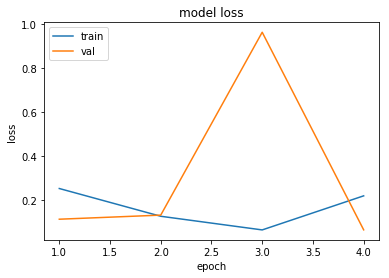

In [21]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

이번 실습 데이터는 데이터의 양이 적어 과적합이 빠르게 시작되므로, 검증 데이터에 대한 오차가 증가하기 시작하는 시점의 바로 직전인 에포크 3~4 정도가 적당합니다. 이 데이터는 에포크 5를 넘어가기 시작하면 검증 데이터의 오차가 증가하는 경향이 있습니다. (한번 시도해보시기 바랍니다.)

## 3. 로이터 뉴스 분류하기(Reuters News Classification)

케라스에서 제공하는 로이터 뉴스 데이터를 LSTM을 이용하여 텍스트 분류를 진행해보도록 하겠습니다.  데이터는 총 11,258개의 뉴스 기사가 46개의 뉴스 카테고리로 분류되는 뉴스 기사 데이터입니다. 

### 1) 로이터 뉴스 데이터에 대한 이해

In [22]:
from keras.datasets import reuters
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

2113536/2110848 [==============================] - 2s 1us/step


케라스 데이터셋으로부터 로이터 뉴스 기사 데이터를 다운로드 하고, 뉴스 기사 데이터를 훈련용과 테스트용으로 나눕니다.

 num_words는 이 데이터에서 등장 빈도 순위로 몇 번째에 해당하는 단어까지를 갖고 올 것인지 조절합니다. 예를 들어서 100이란 값을 넣으면, 등장 빈도 순위가 1~100에 해당하는 단어만 갖고오게 됩니다. 모든 단어를 사용하고자 한다면 None으로 설정합니다. 

test_split은 전체 뉴스 기사 데이터 중 테스트용 뉴스 기사로 몇 퍼센트를 사용할 것인지를 의미합니다. 이번 실습에서는 전체 뉴스 기사 중 20%를 테스트용 뉴스 기사로 사용할 것이므로, 0.2로 설정합니다.

In [23]:
print('훈련용 뉴스 기사: {}'.format(len(X_train)))
print('테스트용 뉴스 기사: {}'.format(len(X_test)))
num_classes = max(y_train) + 1
print('카테고리: {}'.format(num_classes))

훈련용 뉴스 기사: 8982
테스트용 뉴스 기사: 2246
카테고리: 46


y_train는 0부터 시작하는 숫자들로 카테고리 라벨을 부여하므로, 가장 큰 수에 +1을 하여 출력하면 카테고리가 총 몇 개인지를 알 수 있습니다.

In [24]:
print(X_train[0]) # 첫번째 훈련용 뉴스 기사
print(y_train[0]) # 첫번째 훈련용 뉴스 기사의 레이블

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3


훈련용 뉴스 기사 데이터의 구성을 확인하기 위해 첫번째 뉴스 기사를 출력해보았습니다.

위와 같이 훈련용 뉴스 기사 데이터인 X_train 중 첫번째 뉴스 기사인 X_train[0]에는 정수의 나열이 저장되어있습니다. 텍스트가 아니라서 의아할 수 있는데, 현재 이 데이터는 토큰화과 정수 인코딩(각 단어를 정수로 변환)이 끝난 상태입니다.

이 데이터는 단어들이 몇 번 등장하는 지의 빈도에 따라서 인덱스를 부여했습니다. 1이라는 숫자는 이 단어가 이 데이터에서 등장 빈도가 1등이라는 뜻입니다.

 y_train에서 첫번째 뉴스 기사의 레이블인 y_train[0]에는 3이라는 값이 들어있습니다. 이 숫자는 첫번째 훈련용 뉴스 기사가 46개의 카테고리 중 3에 해당하는 카테고리임을 의미합니다.

8,982개의 훈련용 뉴스 기사의 길이가 대체적으로 어떤 크기를 가지는지 확인해보겠습니다.

뉴스 기사의 최대 길이 : 2376
뉴스 기사의 평균 길이 : 145.5398574927633


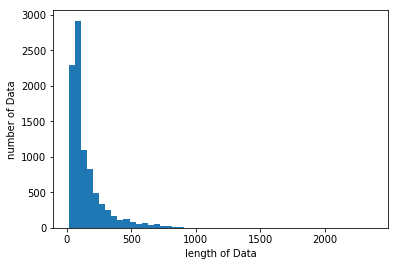

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

print('뉴스 기사의 최대 길이 :',max(len(l) for l in X_train))
print('뉴스 기사의 평균 길이 :',sum(map(len, X_train))/len(X_train))

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

 대체적으로 대부분의 뉴스가 100~200 사이의 길이를 가지는 것을 많은 것을 알 수 있습니다. 

각 뉴스가 어떤 종류의 뉴스에 속하는지 기재되어있는 레이블 값의 분포를 보도록 하겠습니다.

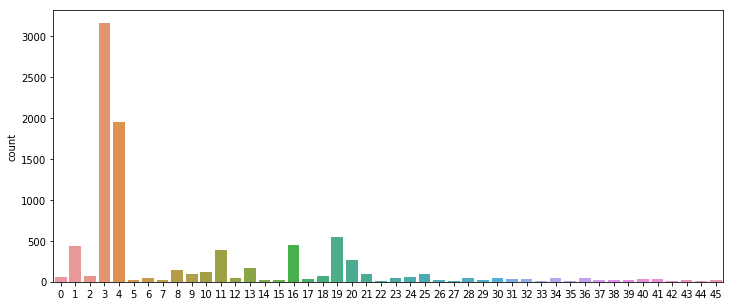

In [26]:
import seaborn as sns
fig, axe=plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

3, 4가 가장 많은 레이블을 차지하는 것을 확인할 수 있습니다. 각 레이블에 대한 정확한 개수를 알아보겠습니다.

In [27]:
import numpy as np
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))
# label_cnt=dict(zip(unique_elements, counts_elements))
# 아래의 출력 결과가 보기 불편하여 병렬로 보고싶다면 위의 label_cnt를 출력

각 레이블에 대한 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


3번 레이블은 총 3,159개가 존재하고 4번 레이블은 총 1,949개가 존재하는 것을 확인할 수 있습니다. 

X_train에 들어있는 숫자들이 각자 어떤 단어들을 나타내고 있는지 확인해보겠습니다.

In [28]:
word_index = reuters.get_word_index()
print(word_index)

557056/550378 [==============================] - 1s 2us/step
{'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, 'woods': 8803, 'hanging': 13796, 'localized': 20672, 'sation': 20673, 'chanthaburi': 20675, 'refunding': 10997, 'hermann': 8804, 'passsengers': 20676, 'stipulate': 20677, 'heublein': 8352, 'screaming': 20713, 'tcby': 16261, 'four': 185, 'grains': 1642, 'broiler': 20680, 'wooden': 12090, 'wednesday': 1220, 'highveld': 13797, 'duffour': 7593, '0053': 20681, 'elections': 3914, '270': 2563, '271': 3551, '272': 5113, '273': 3552, '274': 3400, 'rudman': 7975, '276': 3401, '277': 3478, '278': 3632, '279': 4309, 'dormancy': 9381, 'errors': 7247, 'deferred': 3086, 'sptnd': 20683, 'cooking': 8805, 'stratabit': 20684, 'designing': 16262, 'metalurgicos': 20685, 'databank': 13798, '300er': 20686, 'shocks': 20687, 'nawg': 7972, 'tnta': 20688, 'perforations': 20689, 'affiliates': 2891, '27p': 20690, 'ching': 16263, 'china': 595, 'wagyu': 16264, 'affiliated': 3189, 'chino': 16265, 'chinh': 162

reuters.get_word_index는 각 단어와 그 단어에 부여된 인덱스를 리턴합니다. 이를 출력해보면, 이와 같은 결과가 나옵니다.

좀 더 쉽게 확인하기 위해서 인덱스로부터 단어를 바로 알 수 있도록 해보겠습니다.

In [29]:
index_to_word={}
for key, value in word_index.items():
    index_to_word[value] = key

이제 index_to_word[ ]에다가 인덱스를 입력하면 단어를 확인할 수 있습니다.

In [30]:
print(index_to_word[28842])

nondiscriminatory


28,842란 인덱스를 가진 단어는 무엇일까요? nondiscriminatory임을 확인할 수 있습니다. 잘 쓰이지 않는 단어라서 등장 빈도 순위로 따지면 28,842등이라는 뜻입니다.

In [31]:
print(index_to_word[1])

the


보통 불용어로 분류되는 the가 이 데이터에서도 어김없이 등장 빈도수로 1위를 차지했습니다.

이제 index_to_word를 이용해서 첫번째 훈련용 뉴스 기사인 X_train[0]가 어떤 단어들로 구성되어있는지를 복원해보겠습니다. 이는 X_train[0]에 있는 모든 단어들을 하나씩 불러와서 index_to_word의 입력으로 넣고 이를 계속해서 저장하면 됩니다. 

In [32]:
print(' '.join([index_to_word[X] for X in X_train[0]]))

the wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs


 복원된 결과를 보여줍니다. (물론 정수 인코딩을 수행하기 전에도 어느정도 전처리가 된 상태라서 제대로 된 문장이 나오지는 않습니다.)

### 2) LSTM으로 로이터 뉴스 분류하기

텍스트 분류를 LSTM을 통해서 수행해보도록 하겠습니다.

In [33]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

In [34]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

우선 학습에서는 등장 빈도가 1,000번째까지의 단어들만 사용하겠습니다.

In [35]:
max_len=100
X_train = sequence.pad_sequences(X_train, maxlen=max_len) # 훈련용 뉴스 기사 패딩
X_test = sequence.pad_sequences(X_test, maxlen=max_len) # 테스트용 뉴스 기사 패딩

훈련용 뉴스 기사 데이터과 테스트용 뉴스 기사 데이터에 있는 각각의 뉴스의 길이는 서로 다릅니다. 즉, 각 기사는 단어의 수가 제각각입니다. 모델의 입력으로 사용하고자 모든 뉴스 기사의 길이를 동일하게 맞춥니다.

pad_sequences()를 사용하여 maxlen의 값으로 100을 줬는데, 이는 모든 뉴스 기사의 길이. 즉, 단어 수를 100으로 일치시킨다는 뜻입니다.

뉴스 기사에는 분명히 단어의 수가 100개가 넘는 경우도 있을 것이고, 100개가 안 되는 경우도 있을 것입니다. 그렇기 때문에 단어의 개수가 100개보다 많으면 100개만 선택하고 나머지는 제거하며, 100개보다 부족한 경우에는 부족한 부분이 0으로 패딩됩니다.

이제 훈련용, 테스트용 뉴스 기사 데이터의 레이블에 원-핫 인코딩을 합니다.

In [36]:
y_train = np_utils.to_categorical(y_train) # 훈련용 뉴스 기사 레이블의 원-핫 인코딩
y_test = np_utils.to_categorical(y_test) # 테스트용 뉴스 기사 레이블의 원-핫 인코딩

이제 LSTM 모델을 만들어 봅시다. 

In [37]:
model = Sequential()
model.add(Embedding(1000, 120))
model.add(LSTM(120))
model.add(Dense(46, activation='softmax'))

우선 Embedding()을 사용하여 임베딩 층(embedding layer)을 만들어야 하는데, Embedding()은 최소 두 개의 인자를 받습니다.

첫번째 인자는 단어 집합의 크기이며, 두번째 인자는 임베딩 벡터의 차원입니다. 결과적으로 위 코드에서 Embedding()은 120의 차원을 가지는 임베딩 벡터를 1,000개 생성하는 역할을 합니다.

LSTM의 인자는 메모리 셀의 은닉 상태의 크기(hidden_size)입니다.

6개의 카테고리를 분류해야하므로, 출력층에서는 46개의 뉴런을 사용합니다. 

출력층의 활성화 함수로 소프트맥스 함수를 사용합니다. 소프트맥스 함수는 각 입력에 대해서 46개의 확률 분포를 만들어냅니다.

이제 모델을 컴파일합니다. 

In [38]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

다중 클래스 분류(Multi-Class Classification) 문제이므로 손실 함수로는 categorical_crossentropy를 사용합니다. categorical_crossentropy는 모델의 예측값과 실제값에 대해서 두 확률 분포 사이의 거리를 최소화하도록 훈련합니다.

이제 모델을 학습합니다.

In [39]:
history = model.fit(X_train, y_train, batch_size=100, epochs=20, validation_data=(X_test,y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 14s 2ms/step - loss: 2.5879 - acc: 0.3458 - val_loss: 2.2981 - val_acc: 0.3838
Epoch 2/20
8982/8982 [==============================] - 13s 1ms/step - loss: 2.1098 - acc: 0.4777 - val_loss: 2.0500 - val_acc: 0.4920
Epoch 3/20
8982/8982 [==============================] - 13s 1ms/step - loss: 1.8804 - acc: 0.5218 - val_loss: 1.7622 - val_acc: 0.5432
Epoch 4/20
8982/8982 [==============================] - 13s 1ms/step - loss: 1.7014 - acc: 0.5608 - val_loss: 1.6753 - val_acc: 0.5663
Epoch 5/20
8982/8982 [==============================] - 13s 1ms/step - loss: 1.6192 - acc: 0.5782 - val_loss: 1.6233 - val_acc: 0.5895
Epoch 6/20
8982/8982 [==============================] - 13s 1ms/step - loss: 1.5468 - acc: 0.6069 - val_loss: 1.5579 - val_acc: 0.6069
Epoch 7/20
8982/8982 [==============================] - 13s 1ms/step - loss: 1.4288 - acc: 0.6344 - val_loss: 1.5265 - val_acc: 0.6104
Epoch 8

validation_data로 X_test와 y_test를 사용합니다. val_loss가 줄어들다가 증가하는 상황이 오면 과적합(overfitting)으로 판단하기 위함입니다.

테스트 데이터에 대한 정확도를 출력합니다.

In [40]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

2246/2246 [==============================] - 3s 1ms/step

 테스트 정확도: 0.7115


71%의 정확도를 얻었습니다.

X_test와 y_test를 검증 데이터로 사용하고, 테스트 데이터로 재사용하는 것이 옳은 행동일까요? 앞서 훈련 데이터, 검증 데이터, 테스트 데이터는 서로 다른 데이터를 사용해야한다고 언급한 바 있습니다.

이는 model.fit()의 특성과 관계가 있습니다. model.fit()에서 validation_data는 실제 훈련에는 반영되지 않고 과적합을 판단하기 위한 용도로만 사용됩니다. 즉, validation_data는 기계의 학습에 반영하지 않고 오직 정확도의 결과로만 보여줍니다. 그러므로 validation_data에 X_test, y_test를 사용하더라도 기계는 아직 이 데이터로 학습한 적이 없는 상태입니다. 그러므로 모델이 학습하지 않은 데이터로 정확도를 확인하기 위한 용도인 테스트 정확도를 위한 용도로도 사용하였습니다.

사실 validation_data에 테스트 데이터인 X_test와 y_test를 사용한 경우에는 결국 마지막 에포크에서의 val_acc가 model.evauluate()로 얻은 테스트 정확도와 동일함을 알 수 있습니다. 이는 앞서 스팸 메일 분류하기 실습에서 validation_data 대신 validation_split=0.2를 사용하여 검증 데이터와 테스트 데이터를 다른 데이터를 사용하였을 때와는 다른 결과입니다.

 훈련 데이터와 검증 데이터에 대해서 같이 정확도를 확인하면서 훈련하였으므로, 이를 그래프로 시각화해보겠습니다.

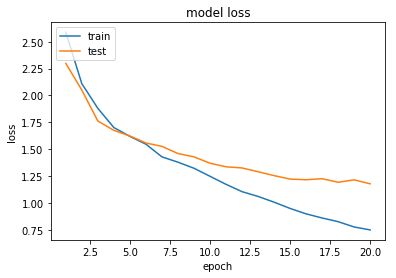

In [41]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

아직은 검증 데이터에서의 오차가 줄어들고 있는 것을 확인할 수 있습니다. 하지만 검증 데이터와 훈련 데이터의 오차의 차이가 벌어지고 있는 것은 과적합의 신호일 수 있으므로 주의해야 합니다.

## 4. IMDB 리뷰 감성 분류하기(IMDB Movie Review Sentiment Analysis)

스탠포드 대학교에서 2011년에 낸 논문에서 이 데이터를 소개하였으며, 당시 논문에서는 이 데이터를 훈련 데이터와 테스트 데이터를 50:50대 비율로 분할하여 88.89%의 정확도를 얻었다고 소개하고 있습니다.

논문 링크 : http://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf

### 1) IMDB 리뷰 데이터에 대한 이해

케라스에서는 해당 IMDB 영화 리뷰 데이터를 imdb.load_data() 함수를 통해 바로 다운로드 할 수 있도록 지원하고 있습니다. 

In [42]:
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
# 영화 리뷰는 X_train에, 감성 정보는 y_train에 저장된다.
# 테스트용 리뷰는 X_test에, 테스트용 리뷰의 감성 정보는 y_test에 저장된다.

17465344/17464789 [==============================] - 4s 0us/step


케라스에서 제공하는 IMDB 리뷰 데이터는 앞서 배운 로이터 뉴스 데이터에서 훈련 데이터와 테스트 데이터를 우리가 직접 비율을 조절했던 것과는 달리 이미 훈련 데이터와 테스트 데이터를 50:50 비율로 구분해서 제공합니다. 

로이터 뉴스 데이터에서 사용했던 test_split과 같은 데이터의 비율을 조절하는 파라미터는 imdb.load_data에서는 지원하지 않습니다.

num_words는 이 데이터에서 등장 빈도 순위로 몇 번째에 해당하는 단어까지를 갖고 올 것인지 조절하는 것입니다. 

In [43]:
print('훈련용 리뷰 개수: {}'.format(len(X_train)))
print('테스트용 리뷰 개수: {}'.format(len(X_test)))
num_classes = max(y_train) + 1
print('카테고리: {}'.format(num_classes))

훈련용 리뷰 개수: 25000
테스트용 리뷰 개수: 25000
카테고리: 2


y_train는 0부터 시작해서 레이블을 부여하므로, y_train에 들어 있는 가장 큰 수에 +1을 하여 출력하면 카테고리가 총 몇 개인지를 알 수 있습니다. 훈련용 리뷰는 25,000개, 테스트용 리뷰는 25,000개, 카테고리는 2개인것을 확인할 수 있습니다.

훈련 데이터가 어떻게 구성되어있는지를 확인하기 위해 첫번째 훈련용 리뷰를 출력하겠습니다. 25,000개의 영화 리뷰 중 첫번째 리뷰 텍스트와 그 리뷰에 대한 레이블을 출력해보는 것입니다.

In [44]:
print(X_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


첫번째 훈련용 리뷰(X_train[0], y_train[0])에서 리뷰 본문에 해당하는 X_train[0]에는 숫자들이 들어있습니다. 이 데이터는 토큰화와 정수 인코딩이라는 텍스트 전처리가 끝난 상태입니다.

IMDB 리뷰 데이터는 전체 데이터에서 각 단어들이 몇 번 등장하는 지의 빈도에 따라서 인덱스를 부여했습니다.

첫번째 훈련용 리뷰에서 레이블에 해당하는 y_train[0]은 1이라는 값이 들어있습니다. 이 숫자는 첫번째 훈련 데이터가 2개의 카테고리 중 1에 해당하는 카테고리임을 의미합니다. 이 예제의 경우 감성 정보로서 0 또는 1의 값을 가지는데, 이 경우에는 긍정을 의미하는 1의 값을 가집니다.

25,000개의 훈련용 리뷰의 각 길이는 전부 다른데, 리뷰의 각 길이가 대체적으로 어떤 크기를 가지는지 그래프를 통해 확인해보도록 하겠습니다.

리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


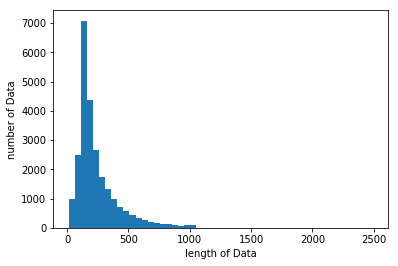

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

대체적으로 500이하의 길이를 가지며, 특히 100~300길이를 가진 데이터가 많은 것을 확인할 수 있습니다. 반면, 가장 긴 길이를 가진 데이터는 길이가 1,000이 넘는 것도 확인할 수 있습니다.

이제 레이블의 분포를 확인해보겠습니다.

In [46]:
import numpy as np
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


25,000개의 리뷰가 존재하는데 두 레이블 0과 1은 각각 12,500개로 균등한 분포를 가지고 있습니다.

X_train에 들어있는 숫자들이 각각 어떤 단어들을 나타내고 있는지 확인해보겠습니다.

In [47]:
word_index = imdb.get_word_index()
index_to_word={}
for key, value in word_index.items():
    index_to_word[value] = key

1646592/1641221 [==============================] - 1s 1us/step


이제 index_to_word에 인덱스를 집어넣으면 전처리 전에 어떤 단어였는지 확인할 수 있습니다.

In [48]:
print(index_to_word[1])

the


In [49]:
print(index_to_word[3941])

journalist


이 데이터에서 빈도가 가장 높은 단어는 the이고, 빈도가 3941번째로 높은 단어는 journalist임을 알 수 있습니다.

첫번째 훈련용 리뷰의 X_train[0]이 인덱스로 바뀌기 전에 어떤 단어들이었는지 확인해보겠습니다. (물론 인덱스로 바꾸기 전에도 어느정도 전처리가 된 상태라서 제대로 된 문장이 나오지는 않습니다.)

In [50]:
print(' '.join([index_to_word[X] for X in X_train[0]]))

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

### 2) LSTM으로 IMDB 리뷰 감성 분류하기

In [51]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence

In [52]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

훈련 데이터는 빈도 순위가 5,000 이상인 단어들만 갖고오도록 하겠습니다.

In [53]:
max_len=500
X_train = sequence.pad_sequences(X_train, maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)

각 리뷰는 문장의 길이가 다르기 때문에, 모델이 처리할 수 있도록 길이를 동일하게 해주어야 합니다. 이때 사용하는 것이 pad_sequences()입니다. 길이는 maxlen에 넣는 값으로 정해집니다. 훈련 데이터가 정한 길이를 초과하면 초과분을 삭제하고, 부족하면 0으로 채웁니다. 여기서는 maxlen의 값을 500으로 지정합니다.

In [54]:
model = Sequential()
model.add(Embedding(5000, 120))
model.add(LSTM(120))
model.add(Dense(1, activation='sigmoid'))

Embedding()은 두 개의 인자를 받는데, 첫번째 인자는 단어 집합의 크기이며 두번째 인자는 임베딩 후의 벡터 크기입니다. 여기서는 120을 선택했습니다. 즉, 입력 데이터에서 모든 단어는 120 차원을 가진 임베딩 벡터로 표현됩니다.

출력층은 활성화 함수로 시그모이드 함수를 갖는 뉴런 하나를 사용합니다. 시그모이드 함수를 사용하면 0 또는 1의 결과를 도출해낼 수 있기 때문에 분류해야하는 카테고리가 두 개일 경우에 출력층에서 사용합니다.

In [55]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=0) # 테스트 데이터에 대해서 정확도 평가
print("정확도: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 285s 11ms/step - loss: 0.4449 - acc: 0.7924 - val_loss: 0.4000 - val_acc: 0.8268
Epoch 2/5
25000/25000 [==============================] - 281s 11ms/step - loss: 0.3044 - acc: 0.8796 - val_loss: 0.3332 - val_acc: 0.8617
Epoch 3/5
25000/25000 [==============================] - 272s 11ms/step - loss: 0.2892 - acc: 0.8826 - val_loss: 0.3420 - val_acc: 0.8558
Epoch 4/5
25000/25000 [==============================] - 274s 11ms/step - loss: 0.2279 - acc: 0.9118 - val_loss: 0.3146 - val_acc: 0.8715
Epoch 5/5
25000/25000 [==============================] - 274s 11ms/step - loss: 0.2154 - acc: 0.9191 - val_loss: 0.3329 - val_acc: 0.8738
정확도: 87.38%


이진 판별값이 출력이 되기 때문에, 손실 함수는 binary_crossentropy를 사용합니다.

최적화 함수는 adam을 사용하였습니다.

 에포크마다 정확도를 구하기위해 accuracy를 추가해줍니다.

에포크는 총 5번을 수행하도록 하겠습니다. 훈련을 마치고 나서는 훈련된 모델에 대해서 테스트 데이터로 정확도를 평가해보도록 합니다.

validation_data에 테스트 데이터인 X_test와 y_test를 사용할 경우에는 마지막 에포크에서의 val_acc가 결국 테스트 데이터의 정확도입니다. 테스트 데이터에 대해서 87%의 정확도가 나왔습니다.

## 5. 나이브 베이즈 분류기(Naive Bayes Classifier)

### 1) 베이즈의 정리(Bayes' theorem)를 이용한 분류 메커니즘

우선 베이즈의 정리(Bayes' theorem)를 이해할 필요가 있습니다. 베이즈 정리는 조건부 확률을 계산하는 방법 중 하나입니다.

$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$

나이브 베이즈 분류기는 이러한 베이즈 정리를 이용하여 텍스트 분류를 수행합니다. 

- P(정상 메일 | 입력 테스트) = 입력 텍스트가 있을 때 정상 메일일 확률
- P(스팸 메일 | 입력 테스트) = 입력 텍스트가 있을 때 스팸 메일일 확률

이를 베이즈의 정리에 따라서 식을 표현하면 이와 같습니다.

- P(정상 메일 | 입력 테스트) = (P(입력 테스트 | 정상 메일) × P(정상 메일)) / P(입력 텍스트)
- P(스팸 메일 | 입력 테스트) = (P(입력 테스트 | 스팸 메일) × P(스팸 메일)) / P(입력 텍스트)

입력 텍스트가 주어졌을 때, P(정상 메일 | 입력 테스트)가 P(스팸 메일 | 입력 테스트)보다 크다면 정상 메일이라고 볼 수 있으며, 그 반대라면 스팸 메일이라고 볼 수 있습니다. 그런데 두 확률 모두 식을 보면 P(입력 텍스트)를 분모로 하고 있음을 알 수 있습니다. 그렇기 때문에 분모를 양쪽에서 제거하고 이렇게 식을 간소화할 수 있습니다.

- P(정상 메일 | 입력 테스트) = P(입력 테스트 | 정상 메일) × P(정상 메일)
- P(스팸 메일 | 입력 테스트) = P(입력 테스트 | 스팸 메일) × P(스팸 메일)

메일의 본문을 어떻게 나이브 베이즈 분류기의 입력으로 사용할 수 있을까요?<br/>
메일의 본문에 있는 모든 단어를 토큰화 시켜서 이 단어들을 나이브 베이즈의 분류기의 입력으로 사용합니다.

만약 메일의 본문에 있는 단어가 3개라고 가정해보겠습니다. 기본적으로 나이브 베이즈 분류기는 모든 단어가 독립적이라고 가정합니다. 메일의 본문에 있는 단어 3개를 w1, w2, w3라고 표현한다면 결국 나이브 베이즈 분류기의 정상 메일일 확률과 스팸 메일일 확률을 구하는 식은 아래와 같습니다.

- P(정상 메일 | 입력 텍스트) = P(w1 | 정상 메일) × P(w2 | 정상 메일) × P(w3 | 정상 메일) × P(정상 메일)
- P(스팸 메일 | 입력 텍스트) = P(w1 | 스팸 메일) × P(w2 | 스팸 메일) × P(w3 | 스팸 메일) × P(스팸 메일)

식을 보고 눈치채신 분들도 있겠지만, 나이브 베이즈 분류기에서 토큰화 이전의 단어의 순서는 중요하지 않습니다. 즉, BoW와 같이 단어의 순서를 무시하고 오직 빈도수만을 고려합니다.

### 2) 스팸 메일 분류기(Spam Detection)

아래와 같은 훈련 데이터가 있다고 가정하겠습니다.

|구분|메일로부터 토큰화 및 정제 된 단어들|분류|
|---|---|---|
|1|me free lottery|스팸 메일|
|2|free get free you|스팸 메일|
|3|you free scholarship|정상 메일|
|4|free to contact me|정상 메일|
|5|you won award|정상 메일|
|6|you ticket lottery|스팸 메일|

이때 you free lottery라는 입력 텍스트에 대해서 정상 메일일 확률과 스팸 메일일 확률 각각을 구해보도록 하겠습니다.

- P(정상 메일 | 입력 텍스트) = P(you | 정상 메일) × P(free | 정상 메일) × P(lottery | 정상 메일) × P(정상 메일)
- P(스팸 메일 | 입력 텍스트) = P(you | 스팸 메일) × P(free | 스팸 메일) × P(lottery | 스팸 메일) × P(스팸 메일)

P(정상 메일) = P(스팸 메일) = 총 메일 6개 중 3개 = 0.5<br/>
위 예제에서는 P(정상 메일)과 P(스팸 메일)의 값은 같으므로, 두 식에서 두 개의 확률은 생략이 가능합니다.

- P(정상 메일 | 입력 텍스트) = P(you | 정상 메일) × P(free | 정상 메일) × P(lottery | 정상 메일)
- P(스팸 메일 | 입력 텍스트) = P(you | 스팸 메일) × P(free | 스팸 메일) × P(lottery | 스팸 메일)

P(you | 정상 메일)을 구하는 방법은 정상 메일에 등장한 모든 단어의 빈도 수의 총합을 분모로하고, 정상 메일에서 you가 총 등장한 빈도의 수를 분자로 하는 것입니다. 이 경우에는 2/10 = 0.2가 됩니다. 이와 같은 원리로 식을 전개하면 이와 같습니다.

- P(정상 메일 | 입력 텍스트) = 2/10 × 2/10 × 0/10 = 0
- P(스팸 메일 | 입력 텍스트) = 2/10 × 3/10 × 2/10 = 0.012

결과적으로 P(정상 메일 | 입력 텍스트) < P(스팸 메일 | 입력 텍스트)이므로 입력 테스트 you free lottery는 스팸 메일로 분류됩니다.

결과적으로 P(정상 메일 | 입력 텍스트) < P(스팸 메일 | 입력 텍스트)이므로 입력 테스트 you free lottery는 스팸 메일로 분류됩니다.

### 3) 뉴스 데이터 분류하기(Classification of 20 News Group with Naive Bayes Classifier)

사이킷 런에서는 Twenty Newsgroups이라고 불리는 20개의 다른 주제를 가진 18,846개의 뉴스 데이터를 제공합니다.

해당 데이터는 이미 훈련 데이터(뉴스 11,314개)와 테스트 데이터(뉴스 7,532개)를 미리 분류해놓았기 때문에 별도로 훈련 데이터와 테스트 데이터를 분류할 필요는 없습니다.

#### (1) 뉴스 데이터에 대한 이해

우선 훈련 데이터를 다운로드 받아보겠습니다.

In [57]:
from sklearn.datasets import fetch_20newsgroups
newsdata=fetch_20newsgroups(subset='train')
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


위의 코드 부분에 subset 부분에 'all'을 넣으면 모든 데이터인 뉴스 18,846개를 다운로드할 수 있으며, 'train'을 넣으면 훈련 데이터를, 'test'를 넣으면 테스트 데이터를 다운로드할 수 있습니다.

newsdata.keys()를 출력하여 해당 데이터가 어떤 속성으로 구성되어져 있는지 출력해보았습니다.

해당 데이터는 data, filenames, target_names, target, DESCR, description이라는 6개 속성의 데이터를 갖고 있습니다.

훈련용 뉴스의 개수를 확인해보도록 하겠습니다.

In [58]:
print (len(newsdata.data), len(newsdata.filenames), len(newsdata.target_names), len(newsdata.target))

11314 11314 20 11314


훈련용 뉴스는 총 11,314개로 구성되어 있습니다.

newsdata.target_names는 이 뉴스 데이터의 20개의 카테고리의 이름을 담고있습니다.

어떤 카테고리들로 구성되어있는지 확인해보도록 하겠습니다.

In [59]:
print(newsdata.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


target에는 총 0부터 19까지의 숫자가 들어가있는데 첫번째 훈련용 뉴스의 경우에는 몇 번 카테고리인지 확인해보겠습니다.

In [60]:
print(newsdata.target[0])

7


첫번째 훈련용 뉴스는 카테고리 7번에 속한다고 라벨이 붙어있습니다.

In [61]:
print(newsdata.target_names[7])

rec.autos


7번 카테고리의 카테고리 제목은 rec.autos입니다. 즉, 첫번째 훈련용 뉴스는 rec.autos 카테고리에 속합니다. 

첫번째 훈련용 뉴스가 어떤 내용을 갖고 있는지 확인해보겠습니다.

In [62]:
print(newsdata.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







메일의 내용을 보니 스포츠 카에 대한 글로 보입니다. 즉, 이 스포츠 카에 대한 글은 총 0부터 19까지의 카테고리 중 7번 레이블에 속하는 글이고, 7번은 rec.autos 카테고리를 의미한다는 것을 알 수 있습니다.

#### (2) 나이브 베이즈 분류

전처리를 해야하는 데이터는 newsdata.data입니다. 위에서 봤듯이 해당 데이터는 토큰화가 전혀 되어있지 않습니다. 나이브 베이즈 분류를 위해서는 데이터를 BoW로 만들어줄 필요가 있습니다.

입력한 텍스트를 자동으로 BoW로 만드는 CountVectorizer를 사용합니다.

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
dtmvector = CountVectorizer()
X_train_dtm = dtmvector.fit_transform(newsdata.data)
print(X_train_dtm.shape)

(11314, 130107)


이제 자동으로 DTM이 완성되었습니다. 

11,314는 훈련용 뉴스의 개수이고 DTM 관점에서는 문서의 수가 되겠습니다.

130,107은 전체 훈련 데이터에 등장한 단어의 수를 의미합니다.

DTM을 그대로 나이브 베이즈 분류기에 사용할 수도 있겠지만 DTM 행렬 대신 TF-IDF 가중치를 적용한 TF-IDF 행렬을 입력으로 텍스트 분류를 수행하면, 성능의 개선을 얻을 수도 있습니다. 

사이킷런은 TF-IDF를 자동 계산해주는 TfidVectorizer 클래스를 제공하므로 이를 사용해보겠습니다.

In [64]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(X_train_dtm)
print(X_train_dtm.shape)

(11314, 130107)


이제 TF-IDF 행렬이 만들어졌습니다. 

 이제 본격적으로 나이브 베이즈 분류를 수행해보도록 하겠습니다.

In [65]:
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
mod = MultinomialNB()
mod.fit(tfidfv, newsdata.target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

모델의 입력으로 TF-IDF 행렬과 11,314개의 훈련 데이터에 대한 레이블이 적혀있는 newsdata.target이 들어갑니다.

In [66]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

여기서 alpha=1.0은 라플라스 스무딩이 적용되었음을 의미합니다.

In [67]:
from sklearn.metrics import accuracy_score #정확도 계산을 위한 함수
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True) #테스트 데이터 갖고오기
X_test_dtm = dtmvector.transform(newsdata_test.data) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(X_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(newsdata_test.target, predicted)) #예측값과 실제값 비교

정확도: 0.7738980350504514


## 6. 네이버 영화 리뷰 감성 분류하기(Naver Movie Review Sentiment Analysis)

방법 자체는 영어 데이터에 대한 텍스트 분류와 크게 달라지지는 않았습니다. 다만 다른 점이 있다면 한국어 데이터는 토큰화(tokenization)를 할 때 형태소 분석기를 사용한다는 점이 다릅니다.

★ 한국어로 진행 순서
1. 데이터 준비
2. 데이터 전처리 (필요한 열 삭제)
3. 데이터 전처리 (Null 값 확인 및 제거)
4. 데이터 전처리 (정규 표현식 사용하여 구두점, 특수문자 등 제거)
5. 토큰화와 불용어 제거 (한국어을 토큰화할 때는 영어처럼 띄어쓰기 기준으로 토큰화를 하는 것이 아니라, 주로 형태소 분석기를 사용)
6. 정수 인코딩
7. train, test 데이터셋으로 나누기
8. 패딩작업 (가장 긴 데이터 길이로 모든 샘플들의 길이를 동일하게 해준다)
9. 모델 만들기, 학습 시작
10. 정확도 확인 

총 200,000개 리뷰로 구성된 데이터로 영화 리뷰에 대한 텍스트와 해당 리뷰가 긍정인 경우 1을 부정인 경우 0으로 표시한 레이블로 구성되어져 있습니다.

### 1) 네이버 영화 리뷰 데이터에 대한 이해

다운로드 링크 : https://github.com/e9t/nsmc/

위의 링크에서 훈련 데이터에 해당하는 ratings_train.txt와 테스트 데이터에 해당하는 ratings_test.txt를 다운로드합니다.

In [75]:
import pandas as pd
train_data= pd.read_table('ratings_train.txt')
test_data= pd.read_table('ratings_test.txt')

C:\Users\joon2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  
C:\Users\joon2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  This is separate from the ipykernel package so we can avoid doing imports until


train_data에 존재하는 영화 리뷰의 개수를 확인해봅시다.

In [76]:
print(len(train_data)) # 리뷰 개수 출력

150000


train_data는 총 150,000개의 리뷰가 존재합니다.

rain_data는 어떤 형태인지 상위 5개만 출력해봅시다.

In [77]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [79]:
print(len(test_data))

50000


test_data는 총 50,000개의 영화 리뷰가 존재합니다. 이제 상위 5개의 샘플을 출력해봅시다.

In [81]:
test_data[:5]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


train_data에서 해당 리뷰의 긍, 부정 유무가 기재되어있는 레이블(label) 값의 분포를 보도록 하겠습니다.

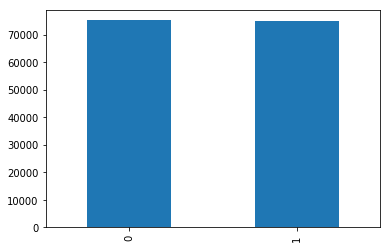

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data['label'].value_counts().plot(kind='bar')

정확하게 몇 개인지 확인하고 싶다면 아래의 코드를 수행하면 됩니다.

In [83]:
print(train_data.groupby('label').size().reset_index(name='count'))

   label  count
0      0  75173
1      1  74827


리뷰 중에 Null 값을 가진 샘플이 있는지는 Pandas의 isnull().values.any()로 확인합니다.

In [84]:
print(train_data.isnull().values.any())

True


어떤 열에 Null 값이 존재하는지 확인해봅시다.

In [85]:
print(train_data.isnull().sum())

id          0
document    5
label       0
dtype: int64


 document 열에서 Null 값이 존재한다는 것을 조건으로 Null 값을 가진 샘플이 어느 인덱스의 위치에 존재하는지 한 번 출력해봅시다.

In [86]:
train_data.loc[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


Null 값을 가진 샘플을 제거하는 방법으로는 해당 샘플을 아예 삭제하거나, 빈 값(empty)으로 바꾸는 방법 등 여러 방법이 있을텐데 여기서는 해당 샘플을 제거하도록 하겠습니다.

In [87]:
train_data=train_data.dropna(how='any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


Null 값을 가진 샘플이 제거되었습니다. 

다시 샘플의 개수를 출력하여 5개의 샘플이 제거되었는지 확인해봅시다.

In [88]:
print(len(train_data))

149995


온점(.)이나 ?와 같은 각종 특수문자가 사용된 것을 확인했습니다. train_data로부터 한글만 남기고 제거하기 위해서 정규 표현식을 사용해보겠습니다.

#### 정규표현식으로 문자만 출력하기 (영어버전)

In [89]:
import re
text='do!!! you expect... people~ to~ read~ the FAQ, etc. and actually accept hard~! atheism?@@'
re.sub(r'[^a-zA-Z ]', '', text) #알파벳과 공백을 제외하고 모두 제거

'do you expect people to read the FAQ etc and actually accept hard atheism'

 영어의 알파벳들을 나타내는 정규 표현식은 [a-zA-Z]입니다. 이 정규 표현식은 영어의 소문자와 대문자들을 모두 포함하고 있는 정규 표현식으로 이를 응용하면 영어에 속하지 않는 구두점이나 특수문자를 제거할 수 있습니다.

위와 같은 원리를 한국어 데이터에 적용하고 싶다면, 우선 한글을 범위 지정할 수 있는 정규 표현식을 찾아내면 되겠습니다. 일반적으로 자음의 범위는 ㄱ ~ ㅎ, 모음의 범위는 ㅏ ~ ㅣ와 같이 지정할 수 있습니다.

한글 정규표현식 참고 : https://www.unicode.org/charts/PDF/U3130.pdf
- ㄱ ~ ㅎ: 3131 ~ 314E
- ㅏ ~ ㅣ: 314F ~ 3163

또한 완성형 한글의 범위는 가 ~ 힣과 같이 사용합니다.<br/>
해당 범위 내에 포함된 음절들은 아래의 링크에서 확인할 수 있습니다.<br/>
https://www.unicode.org/charts/PDF/UAC00.pdf

위의 범위 지정을 모두 반영하여 train_data에 한글과 공백을 제외하고 모두 제거하는 정규 표현식을 수행해봅시다.

In [91]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
train_data[:5]

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


기존의 공백. 즉, 띄어쓰기는 유지되면서 온점과 같은 구두점 등은 제거되었습니다.

이제 토큰화와 불용어 제거를 해보도록 하겠습니다.

불용어는 정의하기 나름인데, 한국어의 조사, 접속사 등의 보편적인 불용어를 사용할 수도 있겠지만 결국 풀고자 하는 문제의 데이터를 지속 검토하면서 계속해서 추가하는 경우 또한 많습니다. 실제 현업인 상황이라면 일반적으로 아래의 불용어보다 더 많은 불용어를 사용하기도 합니다.

In [92]:
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

여기서는 위 정도로만 불용어를 정의하고, 토큰화를 위한 형태소 분석기는 KoNLPy의 Okt를 사용합니다.

잠시 Okt를 복습해봅시다.

In [94]:
import konlpy
from konlpy.tag import Okt
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem=True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

Okt는 위와 같이 KoNLPy에서 제공하는 형태소 분석기입니다.<br/>
한국어을 토큰화할 때는 영어처럼 띄어쓰기 기준으로 토큰화를 하는 것이 아니라, 주로 형태소 분석기를 사용한다고 언급한 바 있습니다.<br/>

stem=True를 사용하면 일정 수준의 정규화를 수행해주는데, 예를 들어 위의 예제의 결과를 보면 '이런'이 '이렇다'로 변환되었고 '만드는'이 '만들다'로 변환된 것을 알 수 있습니다.

이제 train_data에 형태소 분석기를 사용하여 토큰화를 하면서 불용어를 제거하여 X_train에 저장합니다.

In [95]:
X_train=[]
for sentence in train_data['document']:
    temp_X = []
    temp_X=okt.morphs(sentence, stem=True) # 토큰화
    temp_X=[word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

상위 3개의 샘플만 출력하여 결과를 확인해봅시다.

In [96]:
print(X_train[:3])

[['아', '더빙', '진짜', '짜증나다', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'], ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]


형태소 토큰화가 진행된 것을 볼 수 있습니다.

테스트 데이터인 test_data에 방금 진행했던 과정들을 동일하게 진행합니다.

In [97]:
test_data=test_data.dropna(how='any') # Null 값 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행

X_test=[]
for sentence in test_data['document']:
    temp_X = []
    temp_X=okt.morphs(sentence, stem=True) # 토큰화
    temp_X=[word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

이제 기계가 데이터를 숫자로서 처리할 수 있도록 훈련 데이터 X_train과 테스트 데이터 X_test에 대해서 정수 인코딩을 수행합니다.

In [98]:
from keras.preprocessing.text import Tokenizer
max_words = 35000
tokenizer = Tokenizer(num_words=max_words) # 상위 35,000개의 단어만 보존
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

정수 인코딩이 진행되었는지 확인하고자 X_train에 대해서 상위 3개의 샘플만 출력합니다.

In [99]:
print(X_train[:3])

[[50, 457, 16, 260, 660], [919, 459, 41, 599, 1, 214, 1455, 24, 965, 676, 19], [386, 2452, 25024, 2319, 5676, 2, 221, 9]]


전체 데이터에서 가장 길이가 긴 리뷰와 전체 데이터의 길이 분포를 알아보도록 하겠습니다.

리뷰의 최대 길이 : 69
리뷰의 평균 길이 : 10.64700156671889


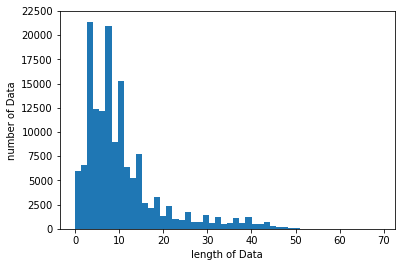

In [100]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

가장 긴 리뷰의 길이는 69이며, 그래프를 봤을 때 전체 데이터의 길이 분포는 대체적으로 약 10내외의 길이를 가지는 것을 볼 수 있습니다.

### 2) LSTM으로 네이버 영화 리뷰 감성 분류하기

모델을 만들기 전에 train_data와 test_data에 존재하는 레이블을 따로 y_train과 y_test에 저장합니다.

In [101]:
y_train=train_data['label']
y_test=test_data['label']

이제 본격적으로 모델을 만들어봅시다.

In [102]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

모델이 처리할 수 있도록 X_train과 X_test의 모든 샘플의 길이를 동일하게 해줍니다. 여기서는 길이를 30으로 정했습니다.

In [103]:
max_len=30
# 전체 데이터의 길이는 30으로 맞춘다.
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [104]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=4, batch_size=60, validation_split=0.2)

Train on 119996 samples, validate on 29999 samples
Epoch 1/4
119996/119996 [==============================] - 118s 984us/step - loss: 0.3905 - acc: 0.8211 - val_loss: 0.3524 - val_acc: 0.8442
Epoch 2/4
119996/119996 [==============================] - 118s 985us/step - loss: 0.3288 - acc: 0.8552 - val_loss: 0.3331 - val_acc: 0.8544
Epoch 3/4
119996/119996 [==============================] - 117s 972us/step - loss: 0.3017 - acc: 0.8715 - val_loss: 0.3350 - val_acc: 0.8536
Epoch 4/4
119996/119996 [==============================] - 130s 1ms/step - loss: 0.2799 - acc: 0.8835 - val_loss: 0.3274 - val_acc: 0.8564


임베딩 벡터의 차원은 100으로 정했고, 리뷰 분류를 위해서 LSTM을 사용합니다.

에포크는 총 4번을 수행하였습니다. 또한 훈련 데이터 중 20%를 검증 데이터로 사용하면서 정확도를 확인합니다.

데이터에 대해서 정확도를 측정합니다.

In [105]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

49997/49997 [==============================] - 22s 443us/step

 테스트 정확도: 0.8515


테스트 데이터에서 85%의 정확도를 얻습니다.

ㄱ-ㅎ와 ㅏ-ㅣ 사이에 어떤 글자들이 포함되어져 있는지는 아래의 링크에서 확인할 수 있습니다.<br/>
https://www.unicode.org/charts/PDF/U3130.pdf


가-힣 사이에 어떤 글자들이 포함되어져 있는지는 아래의 링크에서 확인할 수 있습니다.<br/>
https://www.unicode.org/charts/PDF/UAC00.pdf